In [19]:
import torch
GPU = True
device = torch.device("cuda" if GPU else "cpu")
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# データセットをダウンロード
mnist_data = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,
                         batch_size=4,
                         shuffle=False)

In [21]:
GPU = True
device = torch.device("cuda" if GPU else "cpu")

Label: tensor(5)


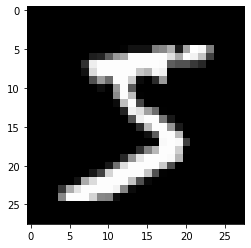

In [22]:
import matplotlib.pyplot as plt
data_iter = iter(data_loader)
images, labels = data_iter.next()

# matplotlibで1つ目のデータを可視化してみる
npimg = images[0].numpy()
npimg = npimg.reshape((28, 28))
plt.imshow(npimg, cmap='gray')
print('Label:', labels[0])

In [23]:
# 訓練データとテストデータを用意
train_data = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_data,
                         batch_size=4,
                         shuffle=True)
test_data = MNIST('~/tmp/mnist', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data,
                         batch_size=4,
                         shuffle=False)

In [24]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 50) # 入力層から隠れ層へ
        self.l2 = nn.Linear(50, 10) # 隠れ層から出力層へ
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) # テンソルのリサイズ: (N, 1, 28, 28) --> (N, 784)
        x = self.l1(x)
        x = self.l2(x)
        return x
    
net = Net()

In [25]:
# コスト関数と最適化手法を定義
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [26]:
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Variableに変換
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 勾配情報をリセット
        optimizer.zero_grad()
        
        # 順伝播
        outputs = net(inputs)
        
        # コスト関数を使ってロスを計算する
        loss = criterion(outputs, labels)
        
        # 逆伝播
        loss.backward()
        
        # パラメータの更新
        optimizer.step()
        
        #running_loss += loss.data[0]
        running_loss += loss.item()
        
        if i % 5000 == 4999:
            print('%d %d loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

1 5000 loss: 2.721
1 10000 loss: 1.669
1 15000 loss: 1.602
2 5000 loss: 1.518
2 10000 loss: 1.506
2 15000 loss: 1.537
3 5000 loss: 1.486
3 10000 loss: 1.411
3 15000 loss: 1.488
Finished Training


In [11]:
import torch

correct = 0
total = 0
for data in test_loader:
    inputs, labels = data
    outputs = net(Variable(inputs))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy %d / %d = %f' % (correct, total, 100*float(correct / total)))

Accuracy 9177 / 10000 = 91.770000


Label: tensor(7)


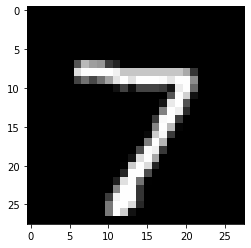

In [12]:
test_iter = iter(test_loader)
inputs, labels = test_iter.next()
outputs = net(Variable(inputs))
_, predicted = torch.max(outputs.data, 1)

plt.imshow(inputs[0].numpy().reshape(28, 28), cmap='gray')
print('Label:', predicted[0])

In [13]:
!python -c "import torch; print('CUDA:', torch.cuda.is_available())"

CUDA: True


In [14]:
!python -c "import torch; print(torch.__version__)"

1.3.1


In [15]:
torch.cuda.get_device_name(0)

'GeForce GTX 1080'

In [16]:
torch.cuda.current_device()

0

In [17]:
torch.cuda.device(0)

In [18]:
torch.cuda.device_count()

1